In [148]:
# Importing required libraries;

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [149]:
df=pd.read_csv("ANN_Dataset1.csv")

In [150]:
df.head()

,param1,param2,param3,param4,param5,param6,param7,param8,param10,param11,param12,param13,param14,param15,param16,param17,is_anomaly
0,0.563486,39,1,1,64,2.98068,10,6,0,0,7815,8344,100,0,4,1.138159,0
1,0.281683,11,1,0,93,0.42304,3,1,1,0,5014,6045,100,1,2,0.570810,1
2,0.214592,14,0,1,85,0.33204,1,6,1,1,5520,7062,100,1,4,0.434823,0
3,0.601626,93,1,0,9,2.78612,5,9,1,1,874,2635,101,1,9,1.213796,1
4,0.916269,83,1,0,55,2.36692,4,5,1,1,2684,784,101,1,8,1.848503,1


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5499 entries, 0 to 5498
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   param1      5499 non-null   float64
 1   param2      5499 non-null   int64  
 2   param3      5499 non-null   int64  
 3   param4      5499 non-null   int64  
 4   param5      5499 non-null   int64  
 5   param6      5499 non-null   float64
 6   param7      5499 non-null   int64  
 7   param8      5499 non-null   int64  
 8   param10     5499 non-null   int64  
 9   param11     5499 non-null   int64  
 10  param12     5499 non-null   int64  
 11  param13     5499 non-null   int64  
 12  param14     5499 non-null   int64  
 13  param15     5499 non-null   int64  
 14  param16     5499 non-null   int64  
 15  param17     5499 non-null   float64
 16  is_anomaly  5499 non-null   int64  
dtypes: float64(3), int64(14)
memory usage: 730.5 KB


In [152]:
df.describe()

,param1,param2,param3,param4,param5,param6,param7,param8,param10,param11,param12,param13,param14,param15,param16,param17,is_anomaly
count,5499.000000,5499.000000,5499.000000,5499.000000,5499.000000,5499.000000,5499.000000,5499.000000,5499.000000,5499.000000,5499.000000,5499.000000,5499.000000,5499.000000,5499.000000,5499.000000,5499.000000
mean,0.497050,50.267321,0.667576,0.492453,50.283870,2.003972,5.518094,5.484452,0.677941,0.488816,5003.287507,4958.998545,516.731224,0.502091,4.953446,1.003451,0.505183
std,0.287597,28.828626,0.471125,0.499989,28.890298,1.162292,2.848833,2.853250,0.467308,0.499920,2868.330305,2882.535508,275.651973,0.500041,3.171125,0.579789,0.500019
min,0.000890,1.000000,0.000000,0.000000,1.000000,0.000120,1.000000,1.000000,0.000000,0.000000,0.000000,4.000000,100.000000,0.000000,0.000000,0.002079,0.000000
25%,0.252663,26.000000,0.000000,0.000000,25.000000,0.984440,3.000000,3.000000,0.000000,0.000000,2526.500000,2416.500000,260.000000,0.000000,2.000000,0.510507,0.000000
50%,0.497705,50.000000,1.000000,0.000000,50.000000,2.031160,6.000000,5.000000,1.000000,0.000000,5047.000000,5002.000000,508.000000,1.000000,5.000000,1.004934,1.000000
75%,0.744892,75.000000,1.000000,1.000000,76.000000,3.025240,8.000000,8.000000,1.000000,1.000000,7462.000000,7407.000000,756.500000,1.000000,8.000000,1.502778,1.000000
max,0.999190,100.000000,1.000000,1.000000,100.000000,3.998120,10.000000,10.000000,1.000000,1.000000,9997.000000,9994.000000,1000.000000,1.000000,10.000000,2.016614,1.000000


In [153]:
# Last column is the class label, and the remaining columns are the input feature values
# You can also choose a few columns as input features and analyse the results

x=df.drop(['is_anomaly'],axis=1)
# x = df[['param1','param3','param6','param8','param11','param13']]

y=list(df['is_anomaly'])

# This scales the input values to a suitable range(remove outlier before scaling).
x = MinMaxScaler().fit_transform(x)

# Split the dataset into a training and testing set
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.25, random_state=4)
y_test = np.array(y_test)
y_train = np.array(y_train)

In [154]:
# LOGISTIC REGRESSION

LogReg = LogisticRegression()
LogReg.fit(x_train,y_train)
y_pred=LogReg.predict(x_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print(accuracy)

0.9992727272727273


In [155]:
x_train.shape

(4124, 16)

In [156]:
y_train.shape

(4124,)

In [157]:
# ARTIFICIAL NEURAL NETWORK
# Here we are defining an ANN with 3 hidden layers, each of which has 32 nodes.
# The hidden layers using ReLU activation and the output layer uses Sigmoid.
# We are using Binary Cross Entropy as our cost/loss function, and Stochastic Gradient Descent as our optimizer.

model = Sequential()
model.add(Dense(32, activation='relu',input_dim = x_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='sgd',metrics=['accuracy'])

In [158]:
# This does the actual model training.
# epochs refers to the number of training iterations to be used.
# batch_size specifies the number of data points to be used in each step of SGD.

history = model.fit(x_train, y_train, epochs=10, shuffle=True, verbose=1, batch_size=32)

Epoch 1/10
 30/129 [=====>........................] - ETA: 0s - loss: 0.7012 - accuracy: 0.4271 

129/129 [==============================] - 0s 1ms/step - loss: 0.6857 - accuracy: 0.5550
Epoch 2/10
129/129 [==============================] - 0s 1ms/step - loss: 0.6406 - accuracy: 0.7682
Epoch 3/10
129/129 [==============================] - 0s 1ms/step - loss: 0.5585 - accuracy: 0.8470
Epoch 4/10
129/129 [==============================] - 0s 724us/step - loss: 0.4193 - accuracy: 0.9047
Epoch 5/10
129/129 [==============================] - 0s 998us/step - loss: 0.2714 - accuracy: 0.9532
Epoch 6/10
129/129 [==============================] - 0s 2ms/step - loss: 0.1635 - accuracy: 0.9840
Epoch 7/10
129/129 [==============================] - 0s 738us/step - loss: 0.1014 - accuracy: 0.9942
Epoch 8/10
129/129 [==============================] - 0s 685us/step - loss: 0.0694 - accuracy: 0.9954
Epoch 9/10
129/129 [==============================] - 0s 772us/step - loss: 0.0527 - accuracy: 0.9964
Epoch 10/10
129/129 [==============================] - 0s 2ms/step - loss: 0.0432 - accuracy: 0.9966


In [159]:
loss_accuracy = model.evaluate(x_test,y_test)
print("Accuracy = ",loss_accuracy[1])

43/43 [==============================] - 0s 663us/step - loss: 0.0340 - accuracy: 0.9993
Accuracy =  0.9992727041244507


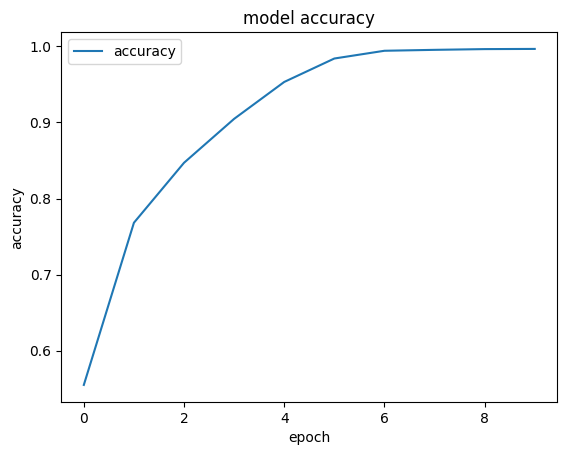

In [160]:
#Plottling change accuracy with epochs
# This is a fairly trivial problem and so the algorithm reaches almost 100% accuracy in the first epoch itself!

plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy'], loc='upper left')
plt.show()

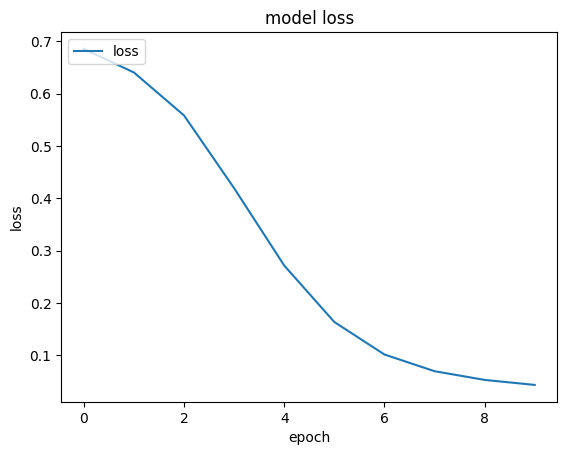

In [161]:
#Plotting loss values for each epoch
# Although the accuracy is almost 100% right from the first epoch, 
# we can see there is a slight decrease in the loss as we train the model for more epochs.

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss'], loc='upper left')
plt.show()

## DATASET 2

### The previous Dataset 1 was fairly simple and we got almost 100% accuracy with both Logistic Regression and ANN.
### Now lets take a slightly more complicated problem and see if ANN can give us better accuracy.

In [162]:
# Source : https://www.kaggle.com/code/caghank/logistic-regression-vs-neural-network-vs-cnn/notebook

In [163]:
from scikeras.wrappers import KerasClassifier, KerasRegressor

from sklearn.model_selection import cross_val_score
from keras.models import Sequential # initialize neural network library
from keras.utils import to_categorical
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
from sklearn.metrics import confusion_matrix
import itertools

from keras.layers import Dense,Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam,Adamax
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [164]:
# Download the csv file with name "SelfShiksha_ANN_MCQ40_ANN_Dataset2.csv"

df =  pd.read_csv("ANN_Dataset2.csv")

In [165]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [166]:
# Image consists of 784 pixel which is 28 * 28 

img_size = 28 

In [167]:
X = df.drop(['label'],axis = 1) 
Y = df['label']

In [168]:
# Normalize the data
X = X / 255.0

In [169]:
X.shape

(42000, 784)

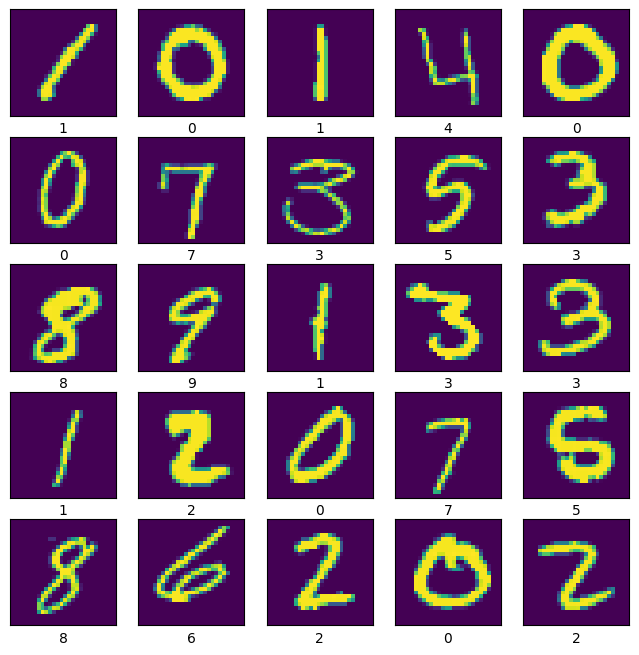

In [170]:
#The first 25 data point in train data and their labels
plt.figure(figsize = (8,8))

for i in range (25) :
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.xlabel(Y[i])
    plt.imshow(X.iloc[i,:].values.reshape(img_size,img_size))

In [171]:
# Divide the data into training and testing set

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42)
Y_train =Y_train.values.reshape(-1,1)

In [172]:
print("X_train shape is : ",X_train.shape)
print("Y_train shape is : ", Y_train.shape)
print("X_test shape is " , X_test.shape)
print("Y_test shape is " , Y_test.shape)

X_train shape is :  (35700, 784)
Y_train shape is :  (35700, 1)
X_test shape is  (6300, 784)
Y_test shape is  (6300,)


In [173]:
# LOGISTIC REGRESSION

LogReg = LogisticRegression(solver='sag',random_state = 42,max_iter= 200, tol = 0.1,)
LogReg.fit(X_train,Y_train)
Y_pred=LogReg.predict(X_test)
accuracy = metrics.accuracy_score(Y_test, Y_pred)
print(accuracy)

print("Train accuracy: {} ".format(LogReg.score(X_train, Y_train)))
print("Test accuracy: {} ".format(LogReg.score(X_test, Y_test)))

/home/nag2mani/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


KeyboardInterrupt: 

In [ ]:
#ARTIFICIAL NEURAL NETWORK

model = Sequential() # initialize neural network
model.add(Dense(units = 240, kernel_initializer = 'uniform', activation = 'relu', input_dim = X_train.shape[1]))
model.add(Dense(units = 240, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'softmax')) #softmax is used for classification

# adamax =Adamax(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
Y_train = to_categorical(Y_train) #we are using 1 hot encoding here
# model.fit(X_train,Y_train,epochs=10,shuffle=True,verbose=2)
history = model.fit(X_train , Y_train,epochs = 10,batch_size = 150)

KeyboardInterrupt: 

In [ ]:
# We can clearly see that for this dataset, ANN outperforms Logistic Regression by a significant margin!

test_loss, test_acc = model.evaluate(X_train, Y_train) #evaluating our model
print('Test accuracy:', test_acc)

1116/1116 [==============================] - 4s 4ms/step - loss: 0.0154 - accuracy: 0.9958
Test accuracy: 0.9957703351974487


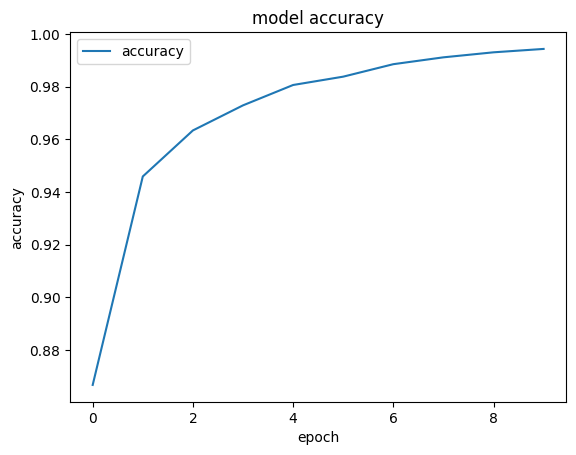

In [ ]:
# This plot shows how the model accuracy increases with increasing epochs

plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy'], loc='upper left')
plt.show()

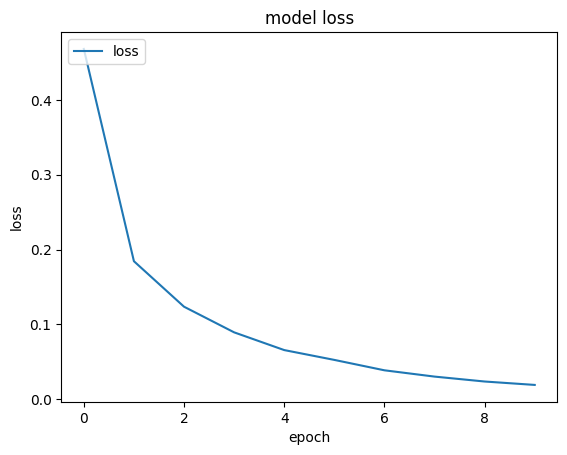

In [ ]:
# This plot shows how the model loss decreases with increasing epochs

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss'], loc='upper left')
plt.show()